# Lesson 3 - Data Acquisition, Cleaning, and Transformation with Python

**Scenario: A retail company has shared three datasets about their customer information, sales, and reviews. However, the data is messy and inconsistent.**

Task:
1. Read the data files (CSV, Excel, JSON).
2. Optionally perform a brief web scrape on a provided simple webpage (e.g., a  promotional page from the company) to extract additional information.
3. Identify and fix issues such as missing values, extra spaces in string fields, and duplicate records.
4. Transform the data by converting data types, renaming columns, and creating new metrics (for example: calculating yearly sales from monthly data).
5. Merge the datasets into a single DataFrame if relevant.
6. Provide brief analysis via visualization to show that data cleaning and transformation were successful.


Original Customers Data:
   customer_id\n first_name  last_name                  email
0              1      Cally     Spieck   cspieck0@state.tx.us
1              2    Krishna      Knath  kknath1@economist.com
2              3   Lothaire    Batrick  lbatrick2@dropbox.com
3              4     Stephi  Gresswell                    NaN
4              5   Kristien     Stopps     kstopps4@fotki.com

Original Sales Data:
   sales_id  customer_id\n                    products  quantity  sales_date
0         1              1   Strawberries - California      10.0  2025-06-03
1         2              2  Water - Spring Water 500ml       1.0  2025-06-06
2         3              3                         NaN       1.0  2025-06-09
3         4              4       Veal - Inside, Choice       4.0  2025-06-16
4         5              5   Strawberries - California       NaN  2025-06-05

Original Reviews Data:
   review_id  customer_id\n  rating
0          1              1     1.0
1          2           

C:\Users\juliana\AppData\Local\Temp\ipykernel_16972\738681449.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_cleaned[col] = customers_cleaned[col].astype(str).str.strip()
C:\Users\juliana\AppData\Local\Temp\ipykernel_16972\738681449.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_cleaned[col] = customers_cleaned[col].astype(str).str.strip()
C:\Users\juliana\AppData\Local\Temp\ipykernel_16972\738681449.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,customer_id,first_name,last_name,email
0,1,Cally,Spieck,cspieck0@state.tx.us
1,2,Krishna,Knath,kknath1@economist.com
2,3,Lothaire,Batrick,lbatrick2@dropbox.com
3,4,Stephi,Gresswell,nan
4,5,Kristien,Stopps,kstopps4@fotki.com



Sales - Before Cleaning:


,sales_id,customer_id\n,products,quantity,sales_date
0,1,1,Strawberries - California,10.0,2025-06-03
1,2,2,Water - Spring Water 500ml,1.0,2025-06-06
2,3,3,NaN,1.0,2025-06-09
3,4,4,"Veal - Inside, Choice",4.0,2025-06-16
4,5,5,Strawberries - California,NaN,2025-06-05



Sales - After Cleaning:


,sales_id,customer_id,products,quantity,sales_date
0,1,1,Strawberries - California,10.0,2025-06-03
1,2,2,Water - Spring Water 500ml,1.0,2025-06-06
2,3,3,Unknown,1.0,2025-06-09
3,4,4,"Veal - Inside, Choice",4.0,2025-06-16
4,5,5,Strawberries - California,0.0,2025-06-05



Reviews - Before Cleaning:


,review_id,customer_id\n,rating
0,1,1,1.0
1,2,2,NaN
2,3,3,3.0
3,4,4,NaN
4,5,5,4.0



Reviews - After Cleaning:


,review_id,customer_id,rating
0,1,1,1.0
1,2,2,0.0
2,3,3,3.0
3,4,4,0.0
4,5,5,4.0



=== Data Transformations ===

Merged Data:


C:\Users\juliana\AppData\Local\Temp\ipykernel_16972\738681449.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_cleaned['customer_id'] = customers_cleaned['customer_id'].astype(str)


,sales_id,customer_id,products,quantity,sales_date,first_name,last_name,email,review_id,rating
0,1,1,Strawberries - California,10.0,2025-06-03,Cally,Spieck,cspieck0@state.tx.us,1,1.0
1,2,2,Water - Spring Water 500ml,1.0,2025-06-06,Krishna,Knath,kknath1@economist.com,2,0.0
2,3,3,Unknown,1.0,2025-06-09,Lothaire,Batrick,lbatrick2@dropbox.com,3,3.0
3,4,4,"Veal - Inside, Choice",4.0,2025-06-16,Stephi,Gresswell,nan,4,0.0
4,5,5,Strawberries - California,0.0,2025-06-05,Kristien,Stopps,kstopps4@fotki.com,5,4.0



=== Data Analysis ===


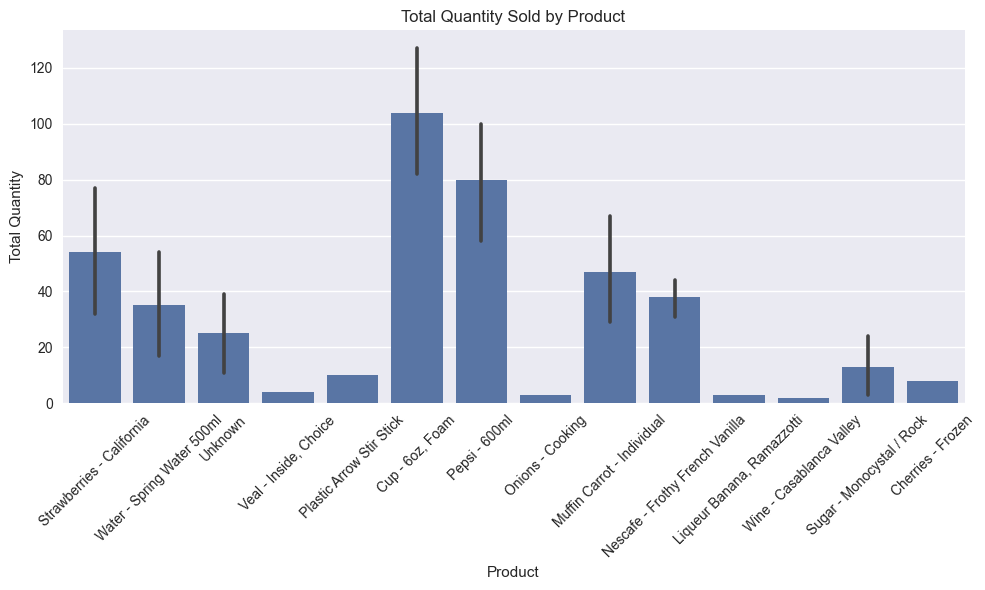

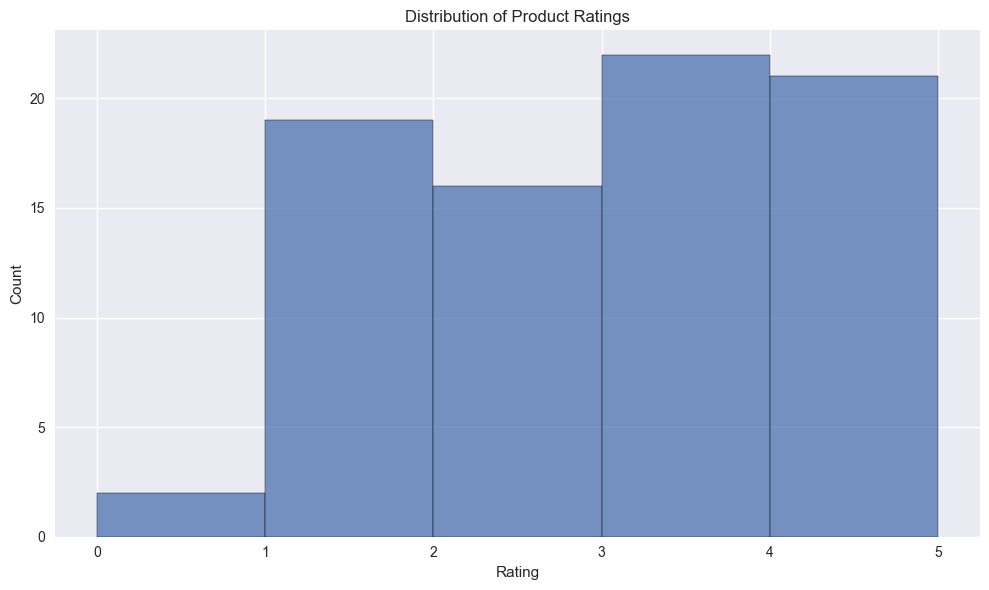

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import json

# Set visualization style
plt.style.use('seaborn-v0_8')

# 1. Reading Datasets (CSV only)
def read_file(file_prefix, file_type):
    try:
        if file_type == 'csv':
            return pd.read_csv(f'{file_prefix}.{file_type}')
        # elif file_type == 'xlsx':
        #     return pd.read_excel(f'{file_prefix}.{file_type}')
        # elif file_type == 'json':
        #     return pd.read_json(f'{file_prefix}.{file_type}')
    except FileNotFoundError:
        print(f"Error: {file_prefix}.{file_type} not found.")
        return None
    except Exception as e:
        print(f"Error reading {file_prefix}.{file_type}: {str(e)}")
        return None

# Read customer file
customers = read_file('customer', 'csv')

# Read sales file
sales = read_file('sales', 'csv')

# Read review file
reviews = read_file('review', 'csv')


# Display first few rows
print("Original Customers Data:")
print(customers.head() if customers is not None else "No customer data loaded.")
print("\nOriginal Sales Data:")
print(sales.head() if sales is not None else "No sales data loaded.")
print("\nOriginal Reviews Data:")
print(reviews.head() if reviews is not None else "No reviews data loaded.")

# 3. Data Cleaning
print("\n=== Data Cleaning ===")

# Customers: Handle missing values, extra spaces, duplicates
if customers is not None:
    print("\nCustomers - Before Cleaning:")
    print(customers.head())

    # Clean column names
    customers.columns = customers.columns.str.strip().str.replace(r'[\r\n]', '', regex=True)

    # Remove duplicates based on customer_id and email
    customers_cleaned = customers.drop_duplicates(subset=['customer_id', 'email'], keep='first')
    # Remove extra spaces from string columns
    for col in ['first_name', 'last_name', 'email']:
        if col in customers_cleaned.columns:
            customers_cleaned[col] = customers_cleaned[col].astype(str).str.strip()
    # Handle missing values
    customers_cleaned['email'] = customers_cleaned['email'].fillna('unknown@email.com')
    # Handle other potential NaN values (e.g., names)
    for col in ['first_name', 'last_name']:
        if col in customers_cleaned.columns:
            customers_cleaned[col] = customers_cleaned[col].fillna('Unknown')

    print("\nCustomers - After Cleaning:")
    display(customers_cleaned.head())
else:
    customers_cleaned = None
    print("No customer data to clean.")

# Sales: Handle duplicates, convert data types, and handle NaN
if sales is not None:
    print("\nSales - Before Cleaning:")
    display(sales.head())

    # Clean column names
    sales.columns = sales.columns.str.strip().str.replace(r'[\r\n]', '', regex=True)

    sales_cleaned = sales.drop_duplicates()
    # Convert sales_date to datetime
    if 'sales_date' in sales_cleaned.columns:
        sales_cleaned['sales_date'] = pd.to_datetime(sales_cleaned['sales_date'], errors='coerce')
    # Ensure quantity is numeric and handle NaN
    if 'quantity' in sales_cleaned.columns:
        sales_cleaned['quantity'] = pd.to_numeric(sales_cleaned['quantity'], errors='coerce')
        sales_cleaned['quantity'] = sales_cleaned['quantity'].fillna(0)  # Fill NaN with 0
    # Handle NaN in products
    if 'products' in sales_cleaned.columns:
        sales_cleaned['products'] = sales_cleaned['products'].fillna('Unknown')  # Fill NaN with 'Unknown'

    print("\nSales - After Cleaning:")
    display(sales_cleaned.head())
else:
    sales_cleaned = None
    print("No sales data to clean.")

# Reviews: Ensure rating is numeric and handle NaN
if reviews is not None:
    print("\nReviews - Before Cleaning:")
    display(reviews.head())

    # Clean column names
    reviews.columns = reviews.columns.str.strip().str.replace(r'[\r\n]', '', regex=True)

    reviews_cleaned = reviews.copy()
    if 'rating' in reviews_cleaned.columns:
        reviews_cleaned['rating'] = pd.to_numeric(reviews_cleaned['rating'], errors='coerce')
        reviews_cleaned['rating'] = reviews_cleaned['rating'].fillna(0)  # Fill NaN with 0

    print("\nReviews - After Cleaning:")
    display(reviews_cleaned.head())
else:
    reviews_cleaned = None
    print("No reviews data to clean.")

# 4. Data Transformations
print("\n=== Data Transformations ===")

# Rename columns for consistency
if customers_cleaned is not None:
    customers_cleaned.columns = ['customer_id', 'first_name', 'last_name', 'email']
if sales_cleaned is not None:
    sales_cleaned.columns = ['sales_id', 'customer_id', 'products', 'quantity', 'sales_date']
if reviews_cleaned is not None:
    reviews_cleaned.columns = ['review_id', 'customer_id', 'rating']

# Merge datasets
if all(df is not None for df in [customers_cleaned, sales_cleaned, reviews_cleaned]):
    # Convert customer_id to string type in all dataframes before merging
    customers_cleaned['customer_id'] = customers_cleaned['customer_id'].astype(str)
    sales_cleaned['customer_id'] = sales_cleaned['customer_id'].astype(str)
    reviews_cleaned['customer_id'] = reviews_cleaned['customer_id'].astype(str)

    merged_data = sales_cleaned.merge(customers_cleaned, on='customer_id', how='left')
    merged_data = merged_data.merge(reviews_cleaned, on='customer_id', how='left')
    print("\nMerged Data:")
    display(merged_data.head())
else:
    merged_data = None
    print("Cannot merge datasets due to missing data.")

# 5. Analysis and Visualization
print("\n=== Data Analysis ===")

# Visualization 1: Sales by Product (Total Quantity)
if sales_cleaned is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=sales_cleaned, x='products', y='quantity', estimator=sum)
    plt.title('Total Quantity Sold by Product')
    plt.xlabel('Product')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No sales data for product sales visualization.")

# Visualization 2: Rating Distribution
if reviews_cleaned is not None:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=reviews_cleaned, x='rating', bins=5)
    plt.title('Distribution of Product Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("No reviews data for rating distribution visualization.")